# INSTRUCTIONS PROVIDED:

## PRODUCTION:
Dataset containing PLC information on the processing settings at COIL-DATE-MT level.
1. `COIL ID`: of the metal coil processed
1. `MT`:meter observation of the coil (i.e. one observation every 7 meters)
1. `DATE`: day of the year in which the processing of a given COIL-MT started
1. `TIME_START_PROCESS`: time in which the processing started 
1. All the remaining fields are settings refering to the processing of a given COIL-MT.

Hint: check the reliability of the MT variable.

## DEFECTS:
Dataset containing information on the detected defect by coil and type of defect.

This information are gathered during quality control processes after the production.
1. `COIL ID`: of the metal coil processed
1. `MT_FROM`: point of the coil in which a given defect start.
1. `MT_TO`: point in which a given defect end.
1. `DATE`: date in which the coil has been processed.
1. `DIF_TIPO_1`(to6): indicator for the kind of of defect detected.

In [1]:
#imports here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#loading data
path_production= '/Users/mattia/Library/CloudStorage/OneDrive-Personal/BBS/05 Machine learnign/00 Fieldwork/4_MANUFACTURING_ROOT CAUSE/RC_PRODUCTION_clean.csv'
path_defects='/Users/mattia/Library/CloudStorage/OneDrive-Personal/BBS/05 Machine learnign/00 Fieldwork/4_MANUFACTURING_ROOT CAUSE/RC_DEFECTS_clean.csv'
production = pd.read_csv(path_production)
defects = pd.read_csv(path_defects, sep=';')

In [3]:
#Data observation
production.head()

,COIL,DATE,MT,TIME_START_PROCESS,SPEED_PROCESS,TEMP_Z1,TEMP_Z2,TEMP_Z3,TEMP_Z4,TEMP_Z5,...,SPZ2_R4,SPZ1_R1_ASS,SPZ1_R2_ASS,TIRO_DECAP,SPEED_FILL,FILL_FORZA,FILL_TIRO,FILL_ALL,FILL_BENDING_POS,FILL_BENDING_NEG
0,240627,2019-03-15,0.0,14:25:23.060,16.934625,671.967562,679.751438,688.119187,716.717250,734.616563,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,240627,2019-03-15,7.0,14:25:53.060,16.773638,668.635875,676.207125,681.034500,710.093250,729.040500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,240627,2019-03-15,14.0,14:26:23.060,11.142165,669.105375,677.042625,678.493125,707.967750,727.783500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,240627,2019-03-15,21.0,14:27:08.060,11.148851,671.631750,681.066000,679.704750,707.241375,727.886250,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,240627,2019-03-15,28.0,14:27:38.060,15.657188,675.052875,686.972813,683.336250,710.432437,730.182375,...,530.110125,14.625,14.625,1956.40875,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
defects.head()


,COIL,MT_FROM,MT_TO,DATE,DIF_TIPO_1,DIF_TIPO_2,DIF_TIPO_3,DIF_TIPO_4,DIF_TIPO_5,DIF_TIPO_6
0,389523,0,599,01/03/19,0,0,1,0,0,0
1,389523,600,1457,01/03/19,0,1,1,0,0,0
2,389528,0,1399,01/03/19,0,0,1,0,0,0
3,389528,1400,1539,01/03/19,0,0,1,0,1,0
4,389712,0,1374,01/03/19,0,0,1,0,0,0


In [5]:
production.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299384 entries, 0 to 299383
Columns: 110 entries, COIL to FILL_BENDING_NEG
dtypes: float64(107), int64(1), object(2)
memory usage: 251.3+ MB


In [6]:
defects.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   COIL        617 non-null    int64 
 1   MT_FROM     617 non-null    int64 
 2   MT_TO       617 non-null    int64 
 3   DATE        617 non-null    object
 4   DIF_TIPO_1  617 non-null    int64 
 5   DIF_TIPO_2  617 non-null    int64 
 6   DIF_TIPO_3  617 non-null    int64 
 7   DIF_TIPO_4  617 non-null    int64 
 8   DIF_TIPO_5  617 non-null    int64 
 9   DIF_TIPO_6  617 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 48.3+ KB


In [7]:
production.sort_values(by=['COIL', 'DATE', 'TIME_START_PROCESS'], inplace=True)
production['MT_REVIEWED'] = production.groupby(['COIL'])['MT'].transform(lambda x: np.arange(start=0, stop=len(x)*7, step=7))
production.drop(columns=['MT'], inplace=True)
column_change=production.pop('MT_REVIEWED')
production.insert(2, 'MT_REVIEWED',column_change)
production.head()

,COIL,DATE,MT_REVIEWED,TIME_START_PROCESS,SPEED_PROCESS,TEMP_Z1,TEMP_Z2,TEMP_Z3,TEMP_Z4,TEMP_Z5,...,SPZ2_R4,SPZ1_R1_ASS,SPZ1_R2_ASS,TIRO_DECAP,SPEED_FILL,FILL_FORZA,FILL_TIRO,FILL_ALL,FILL_BENDING_POS,FILL_BENDING_NEG
0,240627,2019-03-15,0,14:25:23.060,16.934625,671.967562,679.751438,688.119187,716.717250,734.616563,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,240627,2019-03-15,7,14:25:53.060,16.773638,668.635875,676.207125,681.034500,710.093250,729.040500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,240627,2019-03-15,14,14:26:23.060,11.142165,669.105375,677.042625,678.493125,707.967750,727.783500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,240627,2019-03-15,21,14:27:08.060,11.148851,671.631750,681.066000,679.704750,707.241375,727.886250,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,240627,2019-03-15,28,14:27:38.060,15.657188,675.052875,686.972813,683.336250,710.432437,730.182375,...,530.110125,14.625,14.625,1956.40875,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
print(f"Unique COIL values in 'production' dataset: {production['COIL'].nunique()}")
print(f"Unique COIL values in 'defects' dataset: {defects['COIL'].nunique()}")
print(f"Number of errors Type_1: {defects['DIF_TIPO_1'].value_counts().get(1, 0)}")
print(f"Number of errors Type_2: {defects['DIF_TIPO_2'].value_counts().get(1, 0)}")
print(f"Number of errors Type_3: {defects['DIF_TIPO_3'].value_counts().get(1, 0)}")
print(f"Number of errors Type_4: {defects['DIF_TIPO_4'].value_counts().get(1, 0)}")
print(f"Number of errors Type_5: {defects['DIF_TIPO_5'].value_counts().get(1, 0)}")
print(f"Number of errors Type_6: {defects['DIF_TIPO_6'].value_counts().get(1, 0)}")

Unique COIL values in 'production' dataset: 1261
Unique COIL values in 'defects' dataset: 534
Number of errors Type_1: 75
Number of errors Type_2: 76
Number of errors Type_3: 495
Number of errors Type_4: 283
Number of errors Type_5: 50
Number of errors Type_6: 53


Number of missing values in MT: 0
Number of duplicate values in MT: 298277


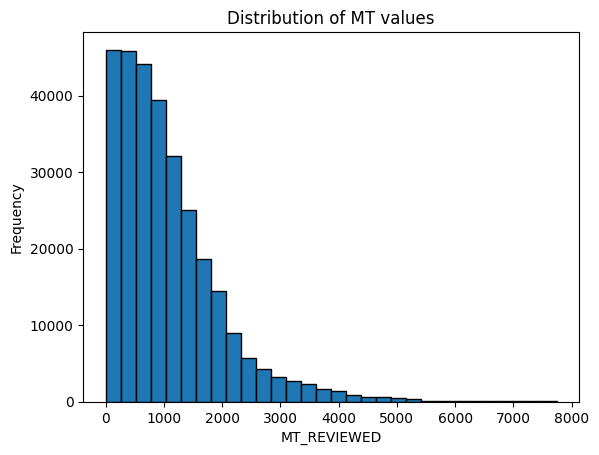

In [9]:
# Assuming df is your DataFrame and "MT" is the column you want to check
mt_values = production["MT_REVIEWED"]

# Check for missing values
print(f"Number of missing values in MT: {mt_values.isna().sum()}")

# Check for duplicates
print(f"Number of duplicate values in MT: {mt_values.duplicated().sum()}")

# Check the distribution
plt.hist(mt_values.dropna(), bins=30, edgecolor='black')
plt.title("Distribution of MT values")
plt.xlabel("MT_REVIEWED")
plt.ylabel("Frequency")
plt.show()

In [10]:
# Check if all 'COIL' values in 'defects' are present in 'production'
defects_coils_in_production = defects['COIL'].isin(production['COIL'])

# If all values are True, then all 'COIL' values in 'defects' are present in 'production'
all_coils_present = defects_coils_in_production.all()

print(f"All 'COIL' values in 'defects' are present in 'production': {all_coils_present}")

# If there are any 'COIL' values in 'defects' not present in 'production', list them
if not all_coils_present:
    missing_coils = defects.loc[~defects_coils_in_production, 'COIL'].unique()
    print(f"'COIL' values in 'defects' not present in 'production': {missing_coils}")


All 'COIL' values in 'defects' are present in 'production': True


In [11]:
# # Code working for excluding the rows with no defects in the production dataset

# # Create a new column in defects to facilitate the merge
# defects['MT'] = defects.apply(lambda x: list(range(x['MT_FROM'], x['MT_TO']+1)), axis=1)

# # Explode the 'MT' column to create a row for each meter within the defect range
# defects_exploded = defects.explode('MT')

# # Perform the merge on 'COIL' and 'MT'
# merged_df = pd.merge(production, defects_exploded, on=['COIL', 'MT'], how='left', suffixes=('', '_defects'))

# # Now, we need to fill in the defect information for the rows where the defects are present
# # We will create a mask that identifies rows where a defect starts and propagate the defect information forward
# for col in ['DATE', 'DIF_TIPO_1', 'DIF_TIPO_2', 'DIF_TIPO_3', 'DIF_TIPO_4', 'DIF_TIPO_5', 'DIF_TIPO_6']:
#     # Forward-fill the defect information for each COIL group
#     merged_df[col] = merged_df.groupby('COIL')[col].ffill()

# # Filter out the rows where 'MT' is less than 'MT_FROM' and greater than 'MT_TO'
# merged_df = merged_df[(merged_df['MT'] >= merged_df['MT_FROM']) & (merged_df['MT'] <= merged_df['MT_TO'])]

# # Now merged_df should have the defect information and date in the correct rows



In [15]:
# This code creates the new dataframe with the defect information applied to the relevant meter ranges.

# Create a new DataFrame to hold the merged data
merged_df = production.copy()

# Initialize defect columns in the merged DataFrame with default values (e.g., NaN or 0)
for i in range(1, 7):
    defect_col = f'DIF_TIPO_{i}'
    merged_df[defect_col] = 0 # or use np.nan, or 0, depending on how you want to represent no defect

# Function to apply the defects to the production DataFrame
def apply_defects(row, production, merged_df):
    coil_id = row['COIL']
    mt_from = row['MT_FROM']
    mt_to = row['MT_TO']
    defect_info = row[['DIF_TIPO_1', 'DIF_TIPO_2', 'DIF_TIPO_3', 'DIF_TIPO_4', 'DIF_TIPO_5', 'DIF_TIPO_6']]
    
    # Filter production for the current coil and meter range
    mask = (production['COIL'] == coil_id) & (production['MT_REVIEWED'] >= mt_from) & (production['MT_REVIEWED'] <= mt_to)
    production_subset = production.loc[mask]
    
    # Update the merged DataFrame with defect information
    for index in production_subset.index:
        merged_df.loc[index, defect_info.index] = defect_info.values

# Apply defects to the production DataFrame
_=defects.apply(lambda row: apply_defects(row, production, merged_df), axis=1)

In [17]:
print(merged_df.shape)
merged_df.head()
#same number of rows as the production dataset

(299384, 116)


,COIL,DATE,MT_REVIEWED,TIME_START_PROCESS,SPEED_PROCESS,TEMP_Z1,TEMP_Z2,TEMP_Z3,TEMP_Z4,TEMP_Z5,...,FILL_TIRO,FILL_ALL,FILL_BENDING_POS,FILL_BENDING_NEG,DIF_TIPO_1,DIF_TIPO_2,DIF_TIPO_3,DIF_TIPO_4,DIF_TIPO_5,DIF_TIPO_6
0,240627,2019-03-15,0,14:25:23.060,16.934625,671.967562,679.751438,688.119187,716.717250,734.616563,...,NaN,NaN,NaN,NaN,0,0,0,0,0,0
1,240627,2019-03-15,7,14:25:53.060,16.773638,668.635875,676.207125,681.034500,710.093250,729.040500,...,NaN,NaN,NaN,NaN,0,0,0,0,0,0
2,240627,2019-03-15,14,14:26:23.060,11.142165,669.105375,677.042625,678.493125,707.967750,727.783500,...,NaN,NaN,NaN,NaN,0,0,0,0,0,0
3,240627,2019-03-15,21,14:27:08.060,11.148851,671.631750,681.066000,679.704750,707.241375,727.886250,...,NaN,NaN,NaN,NaN,0,0,0,0,0,0
4,240627,2019-03-15,28,14:27:38.060,15.657188,675.052875,686.972813,683.336250,710.432437,730.182375,...,NaN,NaN,NaN,NaN,0,0,0,0,0,0


In [14]:
# # Exporting merged data to a CSV file
# merged_df.to_csv('merged_data.csv', index=False)